Import necessary modules

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from confusion_matrix import plot_confusion_matrix as plt_cnf_matrix

Describe the dataset

In [85]:
# import the dataset
bankds= pd.read_csv('dataset/bank.csv', sep=',', header=0, encoding="utf-8")
# describe the dataset
bankds.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Categorizing functions

In [86]:
# Function to categorize months
def categorize_month(argument): 
    switcher = { 
         "jan":1,
         "feb":2,
         "mar":3,
         "apr":4,
         "may":5,
         "jun":6,
         "jul":7,
         "aug":8,
         "sep":9,
        "oct":10,
        "nov":11,
        "dec":12
    }  
    
    return switcher.get(argument.strip(), "nothing") 

# Function to categorize jobs
def categorize_jobs(argument): 
    switcher = { 
         "admin.":1,
         "blue-collar":2,
         "entrepreneur":3,
         "housemaid":4,
         "management":5,
         "retired":6,
         "self-employed":7,
         "services":8,
         "student":9,
        "technician":10,
        "unemployed":11,
        "unknown":12
    }  
    
    return switcher.get(argument.strip(), "nothing") 

# Function to categorize marital
def categorize_marital(argument): 
    switcher = { 
         "divorced":1,
         "married":2,
         "single":3
    }  
    
    return switcher.get(argument.strip(), "nothing") 

# Function to categorize education
def categorize_education(argument): 
    switcher = { 
         "primary":1,
         "secondary":2,
         "tertiary":3,
         "unknown":4,
    }  
    
    return switcher.get(argument.strip(), "nothing") 

# Function to categorize contact
def categorize_contact(argument): 
    switcher = { 
         "cellular":1,
         "telephone":2,
         "unknown":3,
    }  
    
    return switcher.get(argument.strip(), "nothing") 

# Function to categorize poutcome
def categorize_poutcome(argument): 
    switcher = { 
         "failure":1,
         "other":2,
         "success":3,
         "unknown":4,
    }  
    
    return switcher.get(argument.strip(), "nothing")

# Function to categorize yes/no
def categorize_yes_no(argument): 
    switcher = { 
         "no":0,
         "yes":1,
    }  
    
    return switcher.get(argument.strip(), "nothing")

In [87]:
# categorize jobs
bankds['job'] = bankds["job"].apply(lambda value: (categorize_jobs(value)) )

# categorize marital
bankds['marital'] = bankds["marital"].apply(lambda value: (categorize_marital(value)) )

# categorize education
bankds['education'] = bankds["education"].apply(lambda value: (categorize_education(value)) )

# categorize default
bankds['default'] = bankds["default"].apply(lambda value: (categorize_yes_no(value)) )

# categorize housing
bankds['housing'] = bankds["housing"].apply(lambda value: (categorize_yes_no(value)) )

# categorize loan
bankds['loan'] = bankds["loan"].apply(lambda value: (categorize_yes_no(value)) )

# categorize contact
bankds['contact'] = bankds["contact"].apply(lambda value: (categorize_contact(value)) )

# categorize month
bankds['month'] = bankds["month"].apply(lambda value: (categorize_month(value)) )

# categorize poutcome
bankds['poutcome'] = bankds["poutcome"].apply(lambda value: (categorize_poutcome(value)) )

# convert the [yes ,no] to [1, 0] for the y field of the dataset
bankds['y'] = bankds["y"].apply(lambda value: (categorize_yes_no(value)) )


In [88]:
bankds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,11,2,1,0,1787,0,0,1,19,10,79,1,-1,0,4,0
1,33,8,2,2,0,4789,1,1,1,11,5,220,1,339,4,1,0
2,35,5,3,3,0,1350,1,0,1,16,4,185,1,330,1,1,0
3,30,5,2,3,0,1476,1,1,3,3,6,199,4,-1,0,4,0
4,59,2,2,2,0,0,1,0,3,5,5,226,1,-1,0,4,0


In [89]:
trainX, testX, trainy, testy = model_selection.train_test_split(bankds.loc[:, bankds.columns != 'y'], bankds['y'], test_size=0.3,random_state=1)
# Train, Test Split
# make a naive prediction. This predicts all of the test data to be one value of the label
# in this case, all the test data will be predicted to be 0 in the 1st round and 1 in round 2
def naive_prediction(testX, value):
	return [value for x in range(len(testX))]

# evaluate skill of predicting each class value
for value in [0, 1]:
	# forecast
	yhat = naive_prediction(testX, value)
	# evaluate
	score = accuracy_score(testy, yhat)
	# summarize
	print('Naive=%d score=%.3f' % (value, score))

Naive=0 score=0.871
Naive=1 score=0.129


In [90]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [92]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, trainX, trainy, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

KNN: 0.882109 (0.027044)
CART: 0.882443 (0.019110)
NB: 0.839758 (0.024885)


/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/chomsky/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/chomsky/anaconda3/lib/python3.7/site-packages/

SVM: 0.890634 (0.025561)


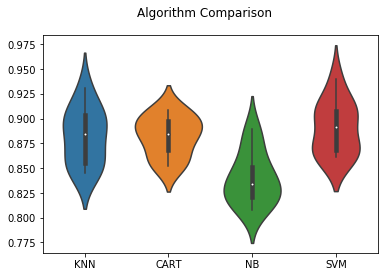

In [93]:
# Compare Algorithms by accuracy measures during the 10-fold validation
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
#plt.boxplot(results)
sns.violinplot(data=results,ax=ax)
ax.set_xticklabels(names)
plt.show()

In [94]:
# Make predictions on validation dataset
clf = LinearDiscriminantAnalysis()
clf.fit(trainX, trainy)
predictions = clf.predict(testX)

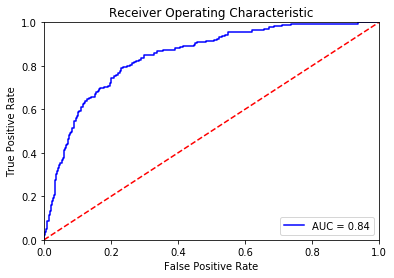

In [95]:
#PLOTTING ROC
probs = clf.predict_proba(testX)
preds = probs[:,1]
fpr, tpr, threshold = sklearn.metrics.roc_curve(testy, preds)
roc_auc = sklearn.metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()